In [45]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx

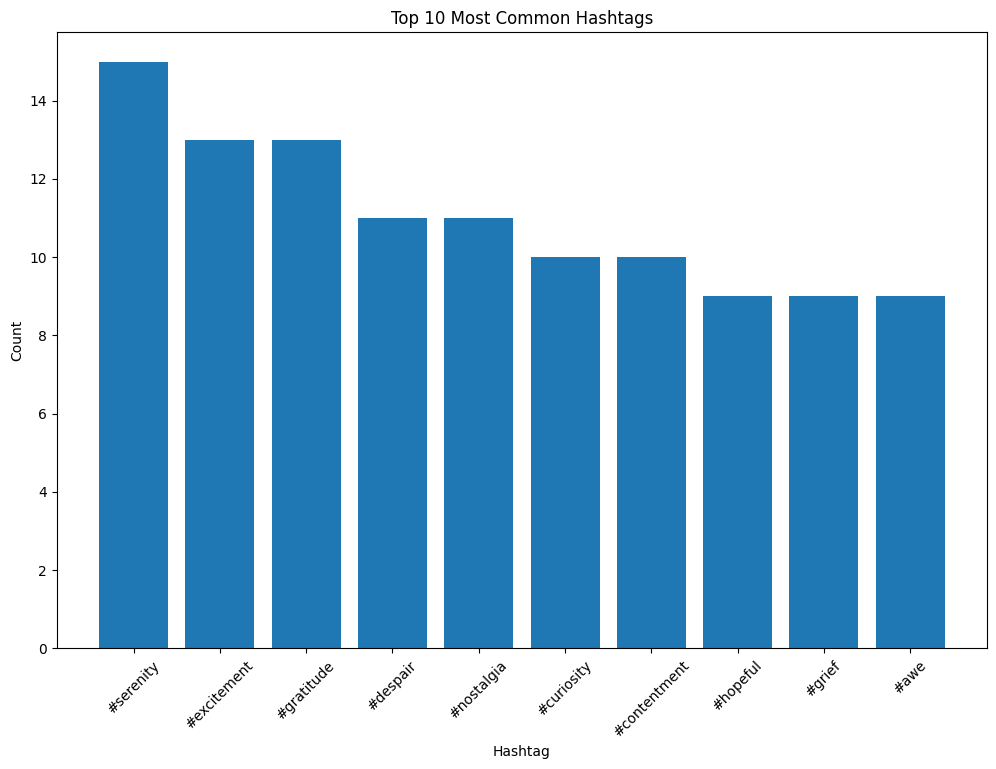

In [46]:
df = pd.read_csv("sentimentdataset.csv")

hashtags_list = df['Hashtags'].str.lower().str.split()

all_hashtags = [tag for sublist in hashtags_list.dropna() for tag in sublist]

hashtag_counts = Counter(all_hashtags)

hashtag_df = pd.DataFrame(hashtag_counts.items(), columns=['Hashtag', 'Count'])

hashtag_df.sort_values(by='Count', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
plt.bar(hashtag_df['Hashtag'][:10], hashtag_df['Count'][:10])
plt.xticks(rotation=45)
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.title('Top 10 Most Common Hashtags')
plt.show()


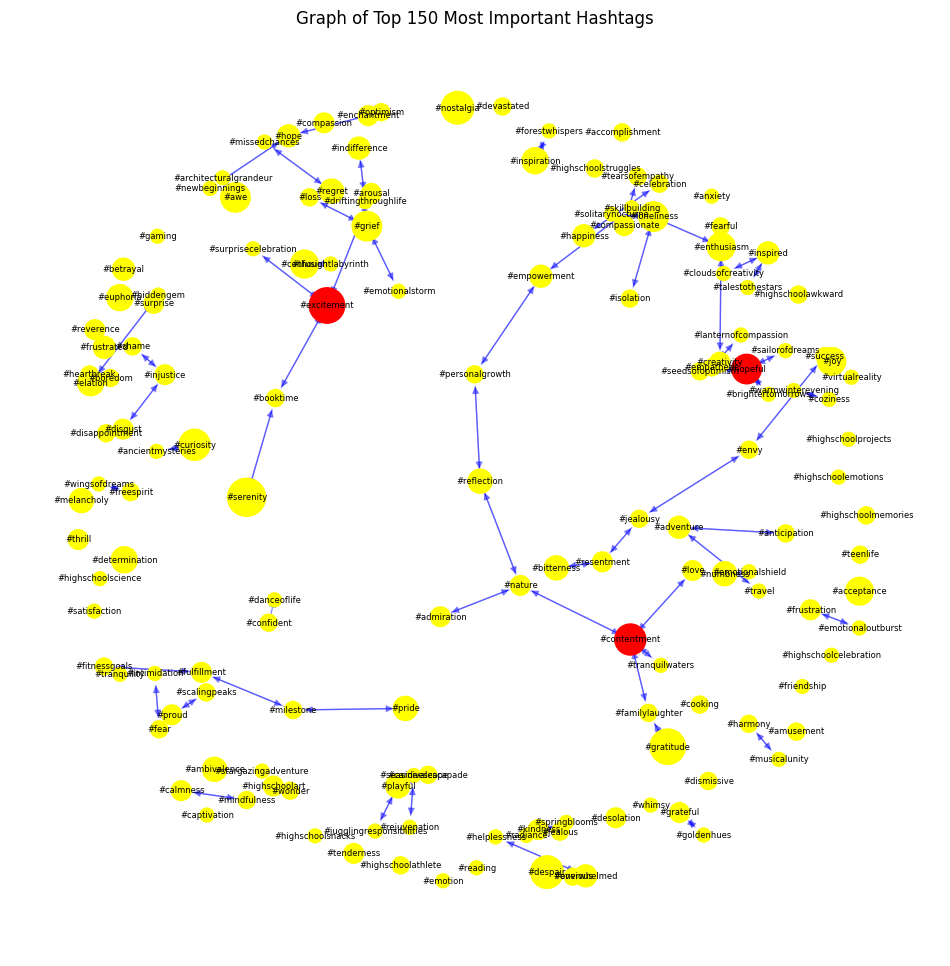

In [47]:
import networkx as nx

hashtag_counts = pd.Series(all_hashtags).value_counts()

top_hashtags = hashtag_counts.head(150)
G = nx.DiGraph()

for hashtag, frequency in top_hashtags.items():
    G.add_node(hashtag, frequency=frequency)

for tags in hashtags_list.dropna():
    for tag1 in tags:
        tag1 = tag1.lower()
        if tag1 in top_hashtags.index:
            for tag2 in tags:
                tag2 = tag2.lower()
                if tag2 in top_hashtags.index and tag1 != tag2:
                    if G.has_edge(tag1, tag2):
                        G[tag1][tag2]['weight'] += 3
                    else:
                        G.add_edge(tag1, tag2, weight=1)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.3)
node_sizes = [G.nodes[node]['frequency'] * 50 for node in G]

node_degrees = dict(G.degree())

top_nodes = sorted(node_degrees, key=node_degrees.get, reverse=True)[:3]

node_colors = ['red' if node in top_nodes else 'yellow' for node in G.nodes]

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size = node_sizes)
nx.draw_networkx_edges(G, pos, edge_color = 'blue', alpha=0.4)
node_labels = {node: node for node in G.nodes}

nx.draw_networkx_labels(G, pos, labels = node_labels, font_size=6, font_color='black')
plt.title('Graph of Top 150 Most Important Hashtags')
plt.axis('off')
plt.show()

In [48]:
print("Top 3 Nodes with Highest Degrees:")
for node in top_nodes:
    print(f"{node} = Degree {node_degrees[node]}")


Top 3 Nodes with Highest Degrees:
#contentment = Degree 8
#excitement = Degree 6
#hopeful = Degree 6
